In [37]:
import numpy as np
import pandas as pd
import scipy.stats as st
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [38]:
ds=pd.read_csv("Rainfall_detection.csv")
#ds=ds[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       #'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
      # 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       #'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       #'Temp3pm', 'RainToday', 'RainTomorrow']]
ds

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [39]:
ds.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [40]:
ds.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [41]:
ds.shape

(8425, 23)

# Target Variable

In [42]:
ds['RainTomorrow'].value_counts()

No     6195
Yes    1991
Name: RainTomorrow, dtype: int64

There is data imbalance we can use SMOTE technique to balance the data.

# Checking DataTypes

In [43]:
ds.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

# Checking Null Values

In [44]:
ds.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

# Removing Null Values

Filling missing values For Numerical Columns

In [45]:
ds['MinTemp'].fillna(ds['MinTemp'].mean(),inplace=True)
ds['MaxTemp'].fillna(ds['MaxTemp'].mean(),inplace=True)
ds['Rainfall'].fillna(ds['Rainfall'].mean(),inplace=True)
ds['Evaporation'].fillna(ds['Evaporation'].mean(),inplace=True)
ds['Sunshine'].fillna(ds['Sunshine'].mean(),inplace=True)
ds['WindGustSpeed'].fillna(ds['WindGustSpeed'].mean(),inplace=True)
ds['WindSpeed9am'].fillna(ds['WindSpeed9am'].mean(),inplace=True)
ds['WindSpeed3pm'].fillna(ds['WindSpeed3pm'].mean(),inplace=True)
ds['Humidity9am'].fillna(ds['Humidity9am'].mean(),inplace=True)
ds['Humidity3pm'].fillna(ds['Humidity3pm'].mean(),inplace=True)
ds['Pressure9am'].fillna(ds['Pressure9am'].mean(),inplace=True)
ds['Pressure3pm'].fillna(ds['Pressure3pm'].mean(),inplace=True)
ds['Cloud9am'].fillna(ds['Cloud9am'].mean(),inplace=True)
ds['Cloud3pm'].fillna(ds['Cloud3pm'].mean(),inplace=True)
ds['Temp9am'].fillna(ds['Temp9am'].mean(),inplace=True)
ds['Temp3pm'].fillna(ds['Temp3pm'].mean(),inplace=True)



Filling missing values For Categorical Columns

In [46]:
ds['WindDir9am'].fillna(ds['WindDir9am'].mode()[0],inplace=True)
ds['WindDir3pm'].fillna(ds['WindDir3pm'].mode()[0],inplace=True)
ds['WindGustDir'].fillna(ds['WindGustDir'].mode()[0],inplace=True)
ds['RainToday'].fillna(ds['RainToday'].mode()[0],inplace=True)
ds['RainTomorrow'].fillna(ds['RainTomorrow'].mode()[0],inplace=True)

In [47]:
ds.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [48]:
ds

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.900000,0.6,5.389395,7.632205,W,44.000000,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.100000,0.0,5.389395,7.632205,WNW,44.000000,NNW,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.700000,0.0,5.389395,7.632205,WSW,46.000000,W,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.000000,0.0,5.389395,7.632205,NE,24.000000,SE,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.300000,1.0,5.389395,7.632205,W,41.000000,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.400000,0.0,5.389395,7.632205,E,31.000000,SE,...,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.300000,0.0,5.389395,7.632205,NNW,22.000000,SE,...,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.900000,0.0,5.389395,7.632205,N,37.000000,SE,...,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.000000,0.0,5.389395,7.632205,SE,28.000000,SSE,...,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,No,No


# EDA PROCESS

In [49]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8425 non-null   float64
 3   MaxTemp        8425 non-null   float64
 4   Rainfall       8425 non-null   float64
 5   Evaporation    8425 non-null   float64
 6   Sunshine       8425 non-null   float64
 7   WindGustDir    8425 non-null   object 
 8   WindGustSpeed  8425 non-null   float64
 9   WindDir9am     8425 non-null   object 
 10  WindDir3pm     8425 non-null   object 
 11  WindSpeed9am   8425 non-null   float64
 12  WindSpeed3pm   8425 non-null   float64
 13  Humidity9am    8425 non-null   float64
 14  Humidity3pm    8425 non-null   float64
 15  Pressure9am    8425 non-null   float64
 16  Pressure3pm    8425 non-null   float64
 17  Cloud9am       8425 non-null   float64
 18  Cloud3pm

In [50]:
ds.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.379488,6.114516,10.309308,3.852004,2.825451,13.776101,10.128579,9.704759,16.774231,18.311894,6.275759,6.217451,2.429205,2.299419,5.608301,5.945849
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.300000,19.300000,0.000000,4.000000,7.632205,31.000000,6.000000,11.000000,56.000000,39.000000,1014.000000,1011.400000,3.000000,3.000000,13.800000,18.100000
50%,13.200000,23.300000,0.000000,5.389395,7.632205,40.174469,13.000000,19.000000,68.000000,51.000000,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.000000
75%,17.300000,28.000000,1.400000,5.389395,8.900000,48.000000,20.000000,24.000000,80.000000,63.000000,1021.300000,1018.800000,7.000000,7.000000,21.900000,26.300000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64


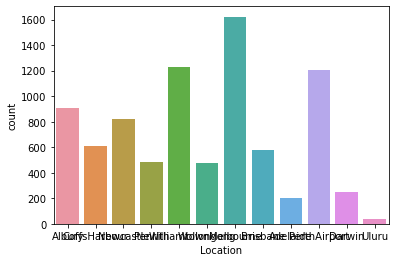

In [51]:
sns.countplot(ds['Location'])
print(ds['Location'].value_counts())

N      1704
SSE     578
S       577
SW      572
E       557
WNW     531
W       507
WSW     504
SE      484
ENE     415
SSW     396
NW      383
NE      353
NNE     343
ESE     302
NNW     219
Name: WindGustDir, dtype: int64


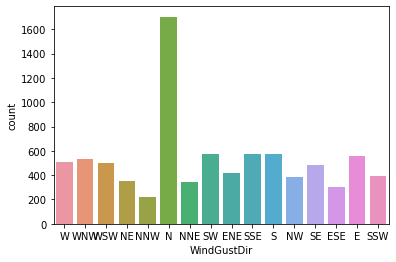

In [52]:
sns.countplot(ds['WindGustDir'])
print(ds['WindGustDir'].value_counts())

N      1735
SW      704
NW      625
WSW     543
SE      505
WNW     480
SSW     467
ENE     433
NNE     430
W       414
NE      409
S       402
E       380
SSE     365
NNW     280
ESE     253
Name: WindDir9am, dtype: int64


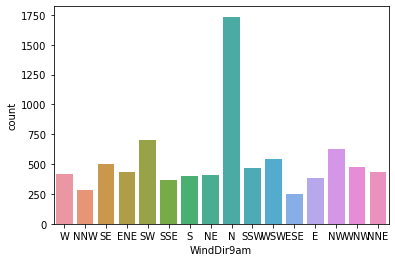

In [53]:
sns.countplot(ds['WindDir9am'])
print(ds['WindDir9am'].value_counts())

No     6435
Yes    1990
Name: RainToday, dtype: int64


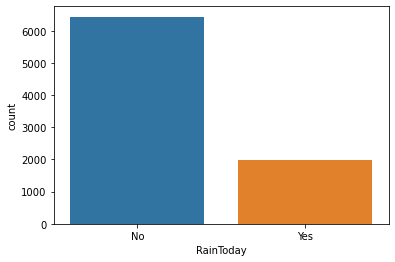

In [54]:
sns.countplot(ds['RainToday'])
print(ds['RainToday'].value_counts())

No     6434
Yes    1991
Name: RainTomorrow, dtype: int64


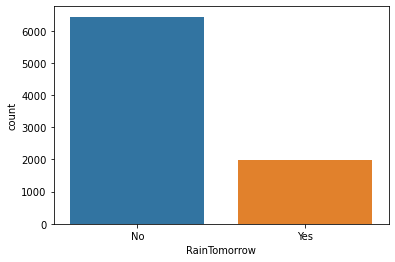

In [55]:
sns.countplot(ds['RainTomorrow'])
print(ds['RainTomorrow'].value_counts())

<AxesSubplot:xlabel='MinTemp', ylabel='Density'>

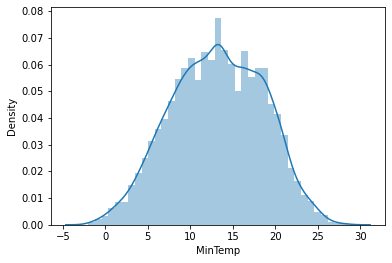

In [56]:
sns.distplot(ds['MinTemp'],kde=True)

<AxesSubplot:xlabel='MaxTemp', ylabel='Density'>

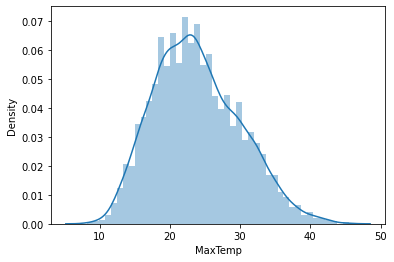

In [57]:
sns.distplot(ds['MaxTemp'],kde=True)

<AxesSubplot:xlabel='Rainfall', ylabel='Density'>

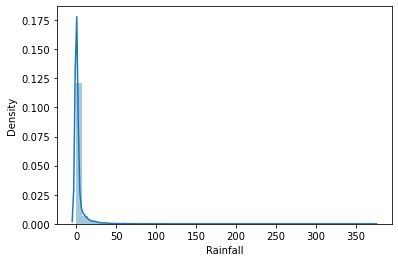

In [58]:
sns.distplot(ds['Rainfall'],kde=True)

<AxesSubplot:xlabel='Evaporation', ylabel='Density'>

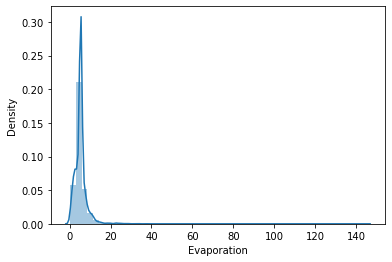

In [59]:
sns.distplot(ds['Evaporation'],kde=True)

<AxesSubplot:xlabel='Sunshine', ylabel='Density'>

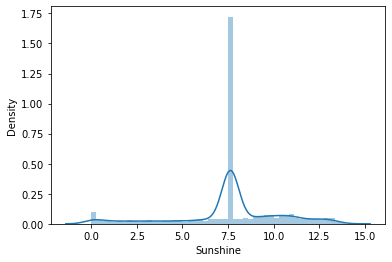

In [60]:
sns.distplot(ds['Sunshine'],kde=True)

<AxesSubplot:xlabel='WindSpeed9am', ylabel='Density'>

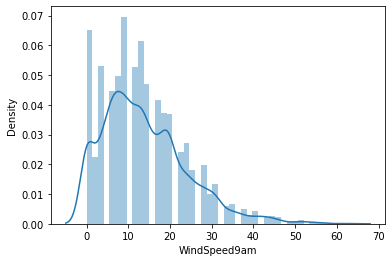

In [61]:
sns.distplot(ds['WindSpeed9am'],kde=True)

<AxesSubplot:xlabel='WindSpeed3pm', ylabel='Density'>

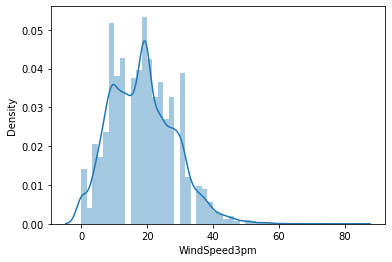

In [62]:
sns.distplot(ds['WindSpeed3pm'],kde=True)

<AxesSubplot:xlabel='Humidity9am', ylabel='Density'>

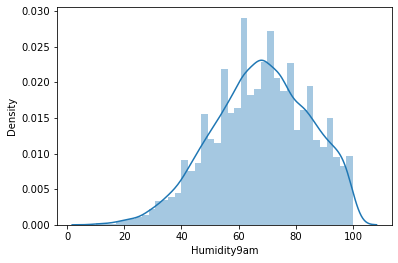

In [63]:
sns.distplot(ds['Humidity9am'],kde=True)

<AxesSubplot:xlabel='Humidity3pm', ylabel='Density'>

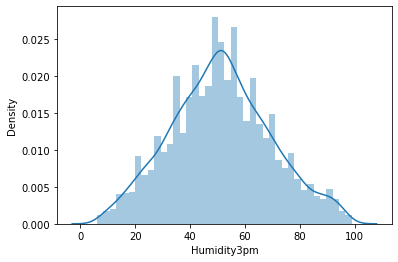

In [64]:
sns.distplot(ds['Humidity3pm'],kde=True)

<AxesSubplot:xlabel='Pressure9am', ylabel='Density'>

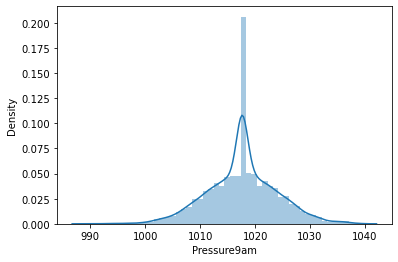

In [65]:
sns.distplot(ds['Pressure9am'],kde=True)

<AxesSubplot:xlabel='Pressure3pm', ylabel='Density'>

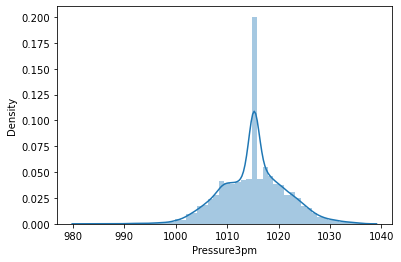

In [66]:
sns.distplot(ds['Pressure3pm'],kde=True)

<AxesSubplot:xlabel='Cloud9am', ylabel='Density'>

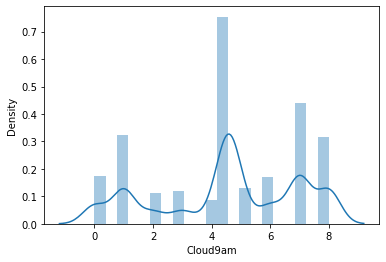

In [67]:
sns.distplot(ds['Cloud9am'],kde=True)

<AxesSubplot:xlabel='Cloud3pm', ylabel='Density'>

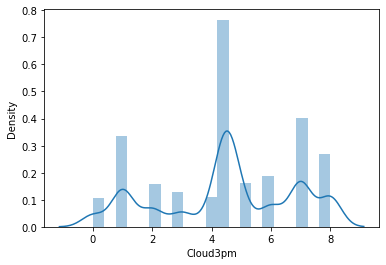

In [68]:
sns.distplot(ds['Cloud3pm'],kde=True)

<AxesSubplot:xlabel='Temp9am', ylabel='Density'>

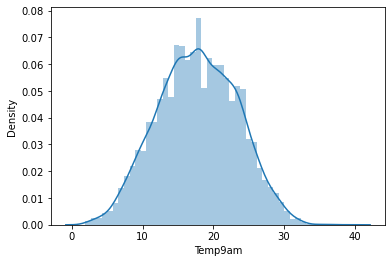

In [69]:
sns.distplot(ds['Temp9am'],kde=True)

<AxesSubplot:xlabel='Temp3pm', ylabel='Density'>

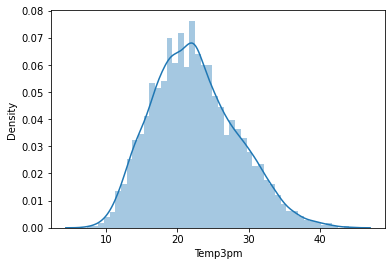

In [70]:
sns.distplot(ds['Temp3pm'],kde=True)

We can see almost all the columns follow bell curve i.e they are normalised

In [71]:
ds.skew().sort_values(ascending=False)

Evaporation      14.023948
Rainfall         13.218403
WindSpeed9am      0.960591
WindGustSpeed     0.757000
WindSpeed3pm      0.494217
Temp3pm           0.397331
MaxTemp           0.380654
Humidity3pm       0.118281
Pressure3pm      -0.010214
Temp9am          -0.014748
Pressure9am      -0.024082
MinTemp          -0.089989
Humidity9am      -0.256743
Cloud3pm         -0.276294
Cloud9am         -0.366503
Sunshine         -0.716525
dtype: float64

# Label Encoder

In [72]:
from sklearn.preprocessing import LabelEncoder
columns=['WindDir9am','WindDir3pm','WindGustDir','RainToday','RainTomorrow','Location']
le=LabelEncoder()
for cols in columns:
    ds[cols]=le.fit_transform(ds[cols])

In [73]:
ds

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,1,13.4,22.900000,0.6,5.389395,7.632205,13,44.000000,13,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0,0
1,2008-12-02,1,7.4,25.100000,0.0,5.389395,7.632205,14,44.000000,6,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0,0
2,2008-12-03,1,12.9,25.700000,0.0,5.389395,7.632205,15,46.000000,13,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0,0
3,2008-12-04,1,9.2,28.000000,0.0,5.389395,7.632205,4,24.000000,9,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0,0
4,2008-12-05,1,17.5,32.300000,1.0,5.389395,7.632205,13,41.000000,1,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,9,2.8,23.400000,0.0,5.389395,7.632205,0,31.000000,9,...,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,0,0
8421,2017-06-22,9,3.6,25.300000,0.0,5.389395,7.632205,6,22.000000,9,...,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,0,0
8422,2017-06-23,9,5.4,26.900000,0.0,5.389395,7.632205,3,37.000000,9,...,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,0,0
8423,2017-06-24,9,7.8,27.000000,0.0,5.389395,7.632205,9,28.000000,10,...,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0,0


we can drop date column as it will not contribute to target variable

In [74]:
ds=ds.drop(['Date'],axis=1)
ds

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1,13.4,22.900000,0.6,5.389395,7.632205,13,44.000000,13,14,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0,0
1,1,7.4,25.100000,0.0,5.389395,7.632205,14,44.000000,6,15,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0,0
2,1,12.9,25.700000,0.0,5.389395,7.632205,15,46.000000,13,15,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0,0
3,1,9.2,28.000000,0.0,5.389395,7.632205,4,24.000000,9,0,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0,0
4,1,17.5,32.300000,1.0,5.389395,7.632205,13,41.000000,1,7,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.400000,0.0,5.389395,7.632205,0,31.000000,9,1,...,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,0,0
8421,9,3.6,25.300000,0.0,5.389395,7.632205,6,22.000000,9,3,...,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,0,0
8422,9,5.4,26.900000,0.0,5.389395,7.632205,3,37.000000,9,14,...,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,0,0
8423,9,7.8,27.000000,0.0,5.389395,7.632205,9,28.000000,10,3,...,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0,0


Location            AxesSubplot(0.125,0.536818;0.0545775x0.343182)
MinTemp          AxesSubplot(0.190493,0.536818;0.0545775x0.343182)
MaxTemp          AxesSubplot(0.255986,0.536818;0.0545775x0.343182)
Rainfall         AxesSubplot(0.321479,0.536818;0.0545775x0.343182)
Evaporation      AxesSubplot(0.386972,0.536818;0.0545775x0.343182)
Sunshine         AxesSubplot(0.452465,0.536818;0.0545775x0.343182)
WindGustDir      AxesSubplot(0.517958,0.536818;0.0545775x0.343182)
WindGustSpeed    AxesSubplot(0.583451,0.536818;0.0545775x0.343182)
WindDir9am       AxesSubplot(0.648944,0.536818;0.0545775x0.343182)
WindDir3pm       AxesSubplot(0.714437,0.536818;0.0545775x0.343182)
WindSpeed9am      AxesSubplot(0.77993,0.536818;0.0545775x0.343182)
WindSpeed3pm     AxesSubplot(0.845423,0.536818;0.0545775x0.343182)
Humidity9am            AxesSubplot(0.125,0.125;0.0545775x0.343182)
Humidity3pm         AxesSubplot(0.190493,0.125;0.0545775x0.343182)
Pressure9am         AxesSubplot(0.255986,0.125;0.0545775x0.343

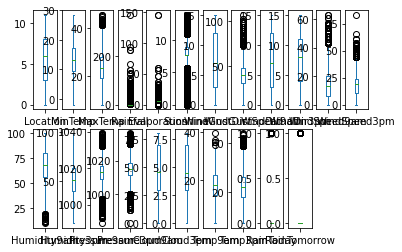

In [75]:
ds.plot(kind='box',subplots=True,layout=(2,12))

In [76]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(ds))
threshold=3
np.where(z>3)
ds_new=ds[(z<3).all(axis=1)]
ds_new

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1,13.4,22.900000,0.6,5.389395,7.632205,13,44.000000,13,14,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0,0
1,1,7.4,25.100000,0.0,5.389395,7.632205,14,44.000000,6,15,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0,0
2,1,12.9,25.700000,0.0,5.389395,7.632205,15,46.000000,13,15,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0,0
3,1,9.2,28.000000,0.0,5.389395,7.632205,4,24.000000,9,0,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0,0
4,1,17.5,32.300000,1.0,5.389395,7.632205,13,41.000000,1,7,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.400000,0.0,5.389395,7.632205,0,31.000000,9,1,...,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,0,0
8421,9,3.6,25.300000,0.0,5.389395,7.632205,6,22.000000,9,3,...,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,0,0
8422,9,5.4,26.900000,0.0,5.389395,7.632205,3,37.000000,9,14,...,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,0,0
8423,9,7.8,27.000000,0.0,5.389395,7.632205,9,28.000000,10,3,...,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0,0


In [77]:
ds.corr()['Rainfall'].sort_values()

Sunshine        -0.169432
Temp3pm         -0.090687
MaxTemp         -0.087451
Pressure9am     -0.072668
Pressure3pm     -0.033649
Temp9am         -0.007083
Location         0.007693
Evaporation      0.023517
WindSpeed3pm     0.024791
WindDir3pm       0.038560
WindGustDir      0.038812
WindSpeed9am     0.050631
WindGustSpeed    0.086000
MinTemp          0.087684
WindDir9am       0.093821
Cloud3pm         0.150760
Cloud9am         0.185444
RainTomorrow     0.220021
Humidity9am      0.228800
Humidity3pm      0.235444
RainToday        0.461106
Rainfall         1.000000
Name: Rainfall, dtype: float64

# Correlation Matrix

In [78]:
ds.corr()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Location,1.000000,0.116531,0.064268,0.007693,0.143519,0.057817,-0.035408,0.231396,-0.027103,-0.027736,...,0.005662,0.055790,-0.032261,-0.020574,0.038019,0.017561,0.118051,0.060570,0.003071,0.002824
MinTemp,0.116531,1.000000,0.717522,0.087684,0.254965,0.056184,-0.145316,0.230058,-0.041650,-0.147166,...,-0.130731,0.079048,-0.429432,-0.422991,0.091604,0.038414,0.887119,0.685520,0.064789,0.092942
MaxTemp,0.064268,0.717522,1.000000,-0.087451,0.322405,0.378403,-0.224670,0.139998,-0.214119,-0.180622,...,-0.390976,-0.421879,-0.325721,-0.403258,-0.253968,-0.250132,0.866039,0.974506,-0.224883,-0.152886
Rainfall,0.007693,0.087684,-0.087451,1.000000,0.023517,-0.169432,0.038812,0.086000,0.093821,0.038560,...,0.228800,0.235444,-0.072668,-0.033649,0.185444,0.150760,-0.007083,-0.090687,0.461106,0.220021
Evaporation,0.143519,0.254965,0.322405,0.023517,1.000000,0.226001,-0.078765,0.136371,-0.061677,-0.047952,...,-0.213108,-0.161661,-0.177786,-0.189558,-0.062283,-0.108022,0.305264,0.315109,-0.088654,-0.059012
Sunshine,0.057817,0.056184,0.378403,-0.169432,0.226001,1.000000,-0.105918,-0.013778,-0.076560,-0.068553,...,-0.360831,-0.440268,0.021887,-0.035863,-0.533391,-0.547304,0.250640,0.395324,-0.234230,-0.327731
WindGustDir,-0.035408,-0.145316,-0.224670,0.038812,-0.078765,-0.105918,1.000000,0.016591,0.403562,0.505799,...,0.036467,0.053567,-0.109704,-0.024997,0.123883,0.092979,-0.176318,-0.238856,0.125188,0.051832
WindGustSpeed,0.231396,0.230058,0.139998,0.086000,0.136371,-0.013778,0.016591,1.000000,-0.072058,0.071235,...,-0.269593,-0.091860,-0.407139,-0.372651,0.023313,0.078631,0.202298,0.102199,0.076822,0.190127
WindDir9am,-0.027103,-0.041650,-0.214119,0.093821,-0.061677,-0.076560,0.403562,-0.072058,1.000000,0.249527,...,0.025604,0.124556,-0.011024,0.073446,0.099582,0.062947,-0.103111,-0.221634,0.157324,0.032860
WindDir3pm,-0.027736,-0.147166,-0.180622,0.038560,-0.047952,-0.068553,0.505799,0.071235,0.249527,1.000000,...,-0.010312,-0.012167,-0.136517,-0.043681,0.075453,0.053986,-0.165072,-0.194463,0.100125,0.008918


<AxesSubplot:>

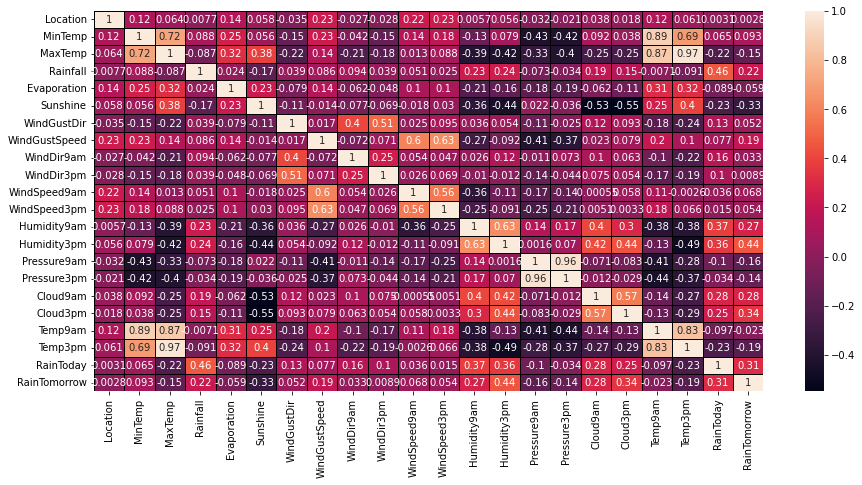

In [79]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(ds.corr(),annot=True,linewidth=0.5,linecolor='black')

In [80]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
data=ds
print(pt.fit(ds))
PowerTransformer()

PowerTransformer()


PowerTransformer()

# a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

# Training and Testing Data

In [81]:
x=ds.drop(columns=['RainTomorrow'],axis=1)
x

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,1,13.4,22.900000,0.6,5.389395,7.632205,13,44.000000,13,14,...,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0
1,1,7.4,25.100000,0.0,5.389395,7.632205,14,44.000000,6,15,...,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0
2,1,12.9,25.700000,0.0,5.389395,7.632205,15,46.000000,13,15,...,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0
3,1,9.2,28.000000,0.0,5.389395,7.632205,4,24.000000,9,0,...,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0
4,1,17.5,32.300000,1.0,5.389395,7.632205,13,41.000000,1,7,...,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.400000,0.0,5.389395,7.632205,0,31.000000,9,1,...,11.0,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,0
8421,9,3.6,25.300000,0.0,5.389395,7.632205,6,22.000000,9,3,...,9.0,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,0
8422,9,5.4,26.900000,0.0,5.389395,7.632205,3,37.000000,9,14,...,9.0,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,0
8423,9,7.8,27.000000,0.0,5.389395,7.632205,9,28.000000,10,3,...,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0


In [82]:
y=ds['RainTomorrow']
y

0       0
1       0
2       0
3       0
4       0
       ..
8420    0
8421    0
8422    0
8423    0
8424    0
Name: RainTomorrow, Length: 8425, dtype: int32

In [83]:
!pip install scikit-learn

In [84]:
!pip install imblearn --user

In [85]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [86]:
from imblearn.over_sampling import SMOTE

In [87]:
smt=SMOTE()
trainx,trainy=smt.fit_resample(x,y)

In [88]:
trainx.value_counts()

Location  MinTemp    MaxTemp    Rainfall    Evaporation  Sunshine  WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am    Temp3pm    RainToday
6         13.193305  23.859976  2.805913    5.389395     7.632205  3            40.174469      3           9           13.847646     18.533662     67.822496    51.249790    1017.640233  1015.236075  4.566622  4.503183  17.762015  22.442934  0            10
10        19.000000  37.100000  0.000000    11.000000    8.200000  14           46.000000      14          8           22.000000     31.000000     28.000000    72.000000    1014.500000  1015.700000  6.000000  7.000000  31.900000  25.800000  0             7
5         8.200000   14.100000  2.600000    2.800000     3.100000  12           61.000000      6           15          22.000000     31.000000     89.000000    74.000000    1009.900000  1009.200000  7.000000  6.000000  8.200000   10.80

In [89]:
trainy.value_counts()

0    6434
1    6434
Name: RainTomorrow, dtype: int64

In [90]:
trainy

0        0
1        0
2        0
3        0
4        0
        ..
12863    1
12864    1
12865    1
12866    1
12867    1
Name: RainTomorrow, Length: 12868, dtype: int32

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

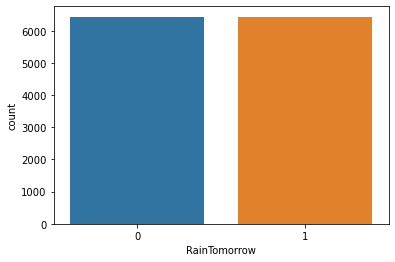

In [91]:
sns.countplot(trainy)

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [93]:
x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,test_size=0.20,random_state=45)

In [94]:
lg=LogisticRegression()

In [95]:
lg.fit(x_train,y_train)

LogisticRegression()

In [96]:
pred=lg.predict(x_test)
pred

array([1, 0, 1, ..., 1, 0, 1])

In [97]:
accuracy_score(y_test,pred)

0.7614607614607615

In [98]:
confusion_matrix(y_test,pred)

array([[1006,  284],
       [ 330,  954]], dtype=int64)

In [99]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.75      0.78      0.77      1290
           1       0.77      0.74      0.76      1284

    accuracy                           0.76      2574
   macro avg       0.76      0.76      0.76      2574
weighted avg       0.76      0.76      0.76      2574



In [100]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
model=rfc.fit(x_train,y_train)
prediction=model.predict(x_test)
print('Accuracy on training data:',format(rfc.score(x_train,y_train)))
print('Accuracy on testing data:',format(rfc.score(x_test,y_test)))

Accuracy on training data: 0.9999028560326404
Accuracy on testing data: 0.9355089355089355


In [101]:
predrfc=rfc.predict(x_test)
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

[[1202   88]
 [  78 1206]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1290
           1       0.93      0.94      0.94      1284

    accuracy                           0.94      2574
   macro avg       0.94      0.94      0.94      2574
weighted avg       0.94      0.94      0.94      2574



In [102]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
model=dtc.fit(x_train,y_train)
prediction=model.predict(x_test)
print('Accuracy on training data:',format(dtc.score(x_train,y_train)))
print('Accuracy on testing data:',format(dtc.score(x_test,y_test)))

Accuracy on training data: 0.9999028560326404
Accuracy on testing data: 0.8764568764568764


In [103]:
preddtc=dtc.predict(x_test)
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

[[1110  180]
 [ 138 1146]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.87      1290
           1       0.86      0.89      0.88      1284

    accuracy                           0.88      2574
   macro avg       0.88      0.88      0.88      2574
weighted avg       0.88      0.88      0.88      2574



In [104]:
from sklearn.svm import SVC
svc=SVC()
model=svc.fit(x_train,y_train)
prediction=model.predict(x_test)
print('Accuracy on training data:',format(svc.score(x_train,y_train)))
print('Accuracy on testing data:',format(svc.score(x_test,y_test)))

Accuracy on training data: 0.7509228676899165
Accuracy on testing data: 0.7451437451437452


In [105]:
predsvc=svc.predict(x_test)
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

[[993 297]
 [359 925]]
              precision    recall  f1-score   support

           0       0.73      0.77      0.75      1290
           1       0.76      0.72      0.74      1284

    accuracy                           0.75      2574
   macro avg       0.75      0.75      0.74      2574
weighted avg       0.75      0.75      0.74      2574



# From the above 4 models we choose RandomForestClassifier as our model as we getting maximum accuracy from it.

# Hyperparameter Tuning

In [106]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
model=rfc.fit(x_train,y_train)
prediction=model.predict(x_test)
print('Accuracy on training data:',format(rfc.score(x_train,y_train)))
print('Accuracy on testing data:',format(rfc.score(x_test,y_test)))
model=RandomForestClassifier(n_estimators=100,min_samples_split=25,max_depth=7,max_features=1)

Accuracy on training data: 0.9999028560326404
Accuracy on testing data: 0.9351204351204351


# AUC ROC Curve

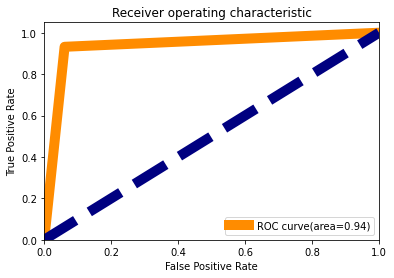

In [107]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(predrfc,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

# Saving The Model

In [108]:
import joblib
joblib.dump(rfc,'rfcfile.obj')
rfc_from_joblib=joblib.load('rfcfile.obj')
rfc_from_joblib.predict(x_test)

array([1, 0, 1, ..., 1, 1, 1])

CONCLUSION

# Problem Statement
b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.

In [109]:
x=ds.drop(columns=['Rainfall'],axis=1)
x

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1,13.4,22.900000,5.389395,7.632205,13,44.000000,13,14,20.0,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0,0
1,1,7.4,25.100000,5.389395,7.632205,14,44.000000,6,15,4.0,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0,0
2,1,12.9,25.700000,5.389395,7.632205,15,46.000000,13,15,19.0,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0,0
3,1,9.2,28.000000,5.389395,7.632205,4,24.000000,9,0,11.0,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0,0
4,1,17.5,32.300000,5.389395,7.632205,13,41.000000,1,7,7.0,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.400000,5.389395,7.632205,0,31.000000,9,1,13.0,...,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,0,0
8421,9,3.6,25.300000,5.389395,7.632205,6,22.000000,9,3,13.0,...,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,0,0
8422,9,5.4,26.900000,5.389395,7.632205,3,37.000000,9,14,9.0,...,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,0,0
8423,9,7.8,27.000000,5.389395,7.632205,9,28.000000,10,3,13.0,...,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0,0


In [110]:
y=ds['Rainfall']
y

0       0.6
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
8420    0.0
8421    0.0
8422    0.0
8423    0.0
8424    0.0
Name: Rainfall, Length: 8425, dtype: float64

In [111]:
x_test.shape

(2574, 21)

In [112]:
x_train.shape

(10294, 21)

In [113]:
y_test.shape

(2574,)

In [114]:
y_train.shape

(10294,)

# Scalling the data using Min-Max Scaler

In [115]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [116]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state{i},the traning accuracy is:-{r2_score(y_train,pred_train)}")
    print(f"At random state{i},the testing accuracy is:-{r2_score(y_test,pred_test)}")
    print("\n")

At random state0,the traning accuracy is:-0.22852108058610365
At random state0,the testing accuracy is:-0.2972676547622649


At random state1,the traning accuracy is:-0.23821593502958294
At random state1,the testing accuracy is:-0.24390458139376592


At random state2,the traning accuracy is:-0.26019733625617314
At random state2,the testing accuracy is:-0.18796179158757187


At random state3,the traning accuracy is:-0.2475956407688379
At random state3,the testing accuracy is:-0.2102485748609475


At random state4,the traning accuracy is:-0.23191461893995535
At random state4,the testing accuracy is:-0.291757405804417


At random state5,the traning accuracy is:-0.23559840063281068
At random state5,the testing accuracy is:-0.2632333806978425


At random state6,the traning accuracy is:-0.226544435952428
At random state6,the testing accuracy is:-0.32797760021977895


At random state7,the traning accuracy is:-0.23360846102114796
At random state7,the testing accuracy is:-0.2671324069972879


A

Accuracy is coming very less we will try another model

In [117]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold {j} the cv score is {cv_mean}and accuracy score for training is {Train_accuracy}and accuracy for the testing is{Test_accuracy}')
    print("\n")

At cross fold 2 the cv score is 0.08459302355622889and accuracy score for training is 0.23112106628251083and accuracy for the testing is0.3144370468152847


At cross fold 3 the cv score is 0.24397318691157963and accuracy score for training is 0.23112106628251083and accuracy for the testing is0.3144370468152847


At cross fold 4 the cv score is 0.20503035976004466and accuracy score for training is 0.23112106628251083and accuracy for the testing is0.3144370468152847


At cross fold 5 the cv score is 0.24539386926279622and accuracy score for training is 0.23112106628251083and accuracy for the testing is0.3144370468152847


At cross fold 6 the cv score is 0.24406011107576406and accuracy score for training is 0.23112106628251083and accuracy for the testing is0.3144370468152847


At cross fold 7 the cv score is 0.2288373652870077and accuracy score for training is 0.23112106628251083and accuracy for the testing is0.3144370468152847


At cross fold 8 the cv score is 0.25537375696991255and accu

In [118]:
lr=LinearRegression()

In [119]:
lr.fit(x_train,y_train)

LinearRegression()

In [120]:
lr.coef_

array([-0.10869957, -0.1461964 , -0.30635995,  0.20596759, -0.2396656 ,
       -0.07023453,  0.07069125,  0.1122156 ,  0.04248138,  0.04662661,
       -0.03395925,  0.05202436,  0.05272606, -0.0649123 ,  0.11178453,
        0.03755132, -0.12022305,  0.1183872 ,  0.47513164,  9.94874401,
        1.08786299])

In [121]:
#predicting the value
pred=lr.predict(x_test)
print('Predictes result price:',pred)
print('Actual price',y_test)

Predictes result price: [13.83086501  0.37201075  0.78658535 ...  1.24634066 -0.71889833
 -0.41265629]
Actual price 907     24.4
6882     0.6
5037     0.0
4667     0.4
437      0.0
        ... 
3073     0.0
3684     0.0
831      0.6
688      0.0
6969     0.0
Name: Rainfall, Length: 1685, dtype: float64


In [122]:
print('error')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

error
Mean absolute error: 2.9447119358534666
Mean squared error: 36.68719816625052
Root Mean Squared Error: 6.0569958037174265


In [132]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
model=rfr.fit(x_train,y_train)
prediction=model.predict(x_test)
print('Accuracy on training data:',format(rfr.score(x_train,y_train)))
print('Accuracy on testing data:',format(rfr.score(x_test,y_test)))

Accuracy on training data: 0.9192262085798483
Accuracy on testing data: 0.34877300752046614


In [134]:
from sklearn.tree import DecisionTreeRegressor 
dtc=DecisionTreeRegressor()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(preddtc)
dtc.score(x_test,y_test)

[9.2 0.  0.  ... 0.  0.  0. ]


-1.1401182290319776

In [123]:
from sklearn.svm import SVR
kernellist=['linear','poly','rbf']
for i in kernellist:
    svr=SVR(kernel=i)
    svr.fit(x_train,y_train)
    print(svr.score(x_train,y_train))

0.15853998281620085
-0.052107627492042674
-0.05465957375263297


In [124]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
knr.score(x_train,y_train)
predknr=knr.predict(x_test)
print(predknr)
knr.score(x_test,y_test)

[2.24 6.4  0.   ... 5.64 0.04 1.56]


0.03342445331660848

# Regularization

In [125]:
from sklearn.linear_model import Lasso,Ridge

In [126]:
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
ls.coef_

array([-0.1086892 , -0.14610536, -0.30622839,  0.20596038, -0.23964896,
       -0.0702165 ,  0.070694  ,  0.11221589,  0.04247879,  0.04662431,
       -0.03395674,  0.05203071,  0.05272262, -0.06480841,  0.11167591,
        0.0375125 , -0.12015854,  0.11832958,  0.47496084,  9.94814827,
        1.08717573])

In [127]:
rd=Ridge(alpha=0.0001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
rd.coef_

array([-0.10869958, -0.14619639, -0.30635997,  0.20596759, -0.23966559,
       -0.07023453,  0.07069126,  0.11221561,  0.04248138,  0.04662661,
       -0.03395925,  0.05202437,  0.05272606, -0.06491232,  0.11178455,
        0.03755133, -0.12022304,  0.11838722,  0.47513163,  9.94874289,
        1.08786303])

In [128]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.0001)
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.predict(x_train))
enr.coef_

[12.37617231  0.21098007  0.75812785 ... 13.20215304  0.89931448
 -1.08719344]


array([-0.10871296, -0.14609951, -0.30634367,  0.20596149, -0.23963591,
       -0.07021745,  0.07070636,  0.1122441 ,  0.04248792,  0.04663902,
       -0.03397081,  0.05206813,  0.05271346, -0.06492748,  0.11178379,
        0.03755782, -0.12016902,  0.11842317,  0.47498806,  9.94467327,
        1.08764469])

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,color='b')
plt.xlabel('Actual rainfall',fontsize=14)
plt.ylabel('Predicted rainfall',fontsize=14)
plt.title('LinearRegression',fontsize=18)
plt.savefig('rfr.png')
plt.show()

# To predict whether it will Rain Tomorrow

In [135]:
x=ds.drop(columns=['RainTomorrow'],axis=1)
x

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,1,13.4,22.900000,0.6,5.389395,7.632205,13,44.000000,13,14,...,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0
1,1,7.4,25.100000,0.0,5.389395,7.632205,14,44.000000,6,15,...,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0
2,1,12.9,25.700000,0.0,5.389395,7.632205,15,46.000000,13,15,...,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0
3,1,9.2,28.000000,0.0,5.389395,7.632205,4,24.000000,9,0,...,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0
4,1,17.5,32.300000,1.0,5.389395,7.632205,13,41.000000,1,7,...,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.400000,0.0,5.389395,7.632205,0,31.000000,9,1,...,11.0,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,0
8421,9,3.6,25.300000,0.0,5.389395,7.632205,6,22.000000,9,3,...,9.0,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,0
8422,9,5.4,26.900000,0.0,5.389395,7.632205,3,37.000000,9,14,...,9.0,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,0
8423,9,7.8,27.000000,0.0,5.389395,7.632205,9,28.000000,10,3,...,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0


In [136]:
y=ds['RainTomorrow']
y

0       0
1       0
2       0
3       0
4       0
       ..
8420    0
8421    0
8422    0
8423    0
8424    0
Name: RainTomorrow, Length: 8425, dtype: int32

In [137]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=45)

In [138]:
lg=LogisticRegression()


In [139]:
lg.fit(x_train,y_train)

LogisticRegression()

In [140]:
pred=lg.predict(x_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [141]:
accuracy_score(y_test,pred)

0.8356083086053413

In [142]:
confusion_matrix(y_test,pred)

array([[1215,   79],
       [ 198,  193]], dtype=int64)

In [143]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1294
           1       0.71      0.49      0.58       391

    accuracy                           0.84      1685
   macro avg       0.78      0.72      0.74      1685
weighted avg       0.82      0.84      0.82      1685



In [144]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
model=rfc.fit(x_train,y_train)
prediction=model.predict(x_test)
print('Accuracy on training data:',format(rfc.score(x_train,y_train)))
print('Accuracy on testing data:',format(rfc.score(x_test,y_test)))

Accuracy on training data: 0.9997032640949555
Accuracy on testing data: 0.9050445103857567


In [145]:
predrfc=rfc.predict(x_test)
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

[[1255   39]
 [ 121  270]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1294
           1       0.87      0.69      0.77       391

    accuracy                           0.91      1685
   macro avg       0.89      0.83      0.86      1685
weighted avg       0.90      0.91      0.90      1685



In [146]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
model=dtc.fit(x_train,y_train)
prediction=model.predict(x_test)
print('Accuracy on training data:',format(dtc.score(x_train,y_train)))
print('Accuracy on testing data:',format(dtc.score(x_test,y_test)))

Accuracy on training data: 0.9998516320474777
Accuracy on testing data: 0.8462908011869437


In [147]:
preddtc=rfc.predict(x_test)
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

[[1255   39]
 [ 121  270]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1294
           1       0.87      0.69      0.77       391

    accuracy                           0.91      1685
   macro avg       0.89      0.83      0.86      1685
weighted avg       0.90      0.91      0.90      1685



In [148]:
from sklearn.svm import SVC
svc=SVC()
model=svc.fit(x_train,y_train)
prediction=model.predict(x_test)
print('Accuracy on training data:',format(svc.score(x_train,y_train)))
print('Accuracy on testing data:',format(svc.score(x_test,y_test)))

Accuracy on training data: 0.7629080118694362
Accuracy on testing data: 0.769139465875371


In [149]:
predsvc=svc.predict(x_test)
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

[[1294    0]
 [ 389    2]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      1294
           1       1.00      0.01      0.01       391

    accuracy                           0.77      1685
   macro avg       0.88      0.50      0.44      1685
weighted avg       0.82      0.77      0.67      1685



# From the above 4 models we choose RandomForestClassifier as our model as we getting maximum accuracy from it

# Hyperparameter Tuning

In [150]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
model=rfc.fit(x_train,y_train)
prediction=model.predict(x_test)
print('Accuracy on training data:',format(rfc.score(x_train,y_train)))
print('Accuracy on testing data:',format(rfc.score(x_test,y_test)))
model=RandomForestClassifier(n_estimators=100,min_samples_split=25,max_depth=7,max_features=1)

Accuracy on training data: 0.9998516320474777
Accuracy on testing data: 0.9050445103857567


# AUC ROC Curve

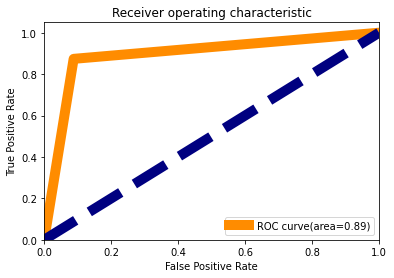

In [151]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(predrfc,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC curve(area=%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

# Model Saving

In [152]:
import joblib
joblib.dump(rfc,'rfcfile.obj')
rfc_from_joblib=joblib.load('rfcfile.obj')
rfc_from_joblib.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

conclution